## Importamos bibliotecas

In [338]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Cajeros

### Cajero Estandar

In [339]:
CAPACIDAD_BILLETES_DEPOSITOS= 2000
CAPACIDAD_BILLETES_EXTRACCIONES = 2000
VALOR_BILLETES = 100

In [340]:
class CajeroEstandar:
    def __init__(self, capacidad_billetes_depositos, capacidad_billetes_extracciones):
        self.capacidad_billetes_depositos = capacidad_billetes_depositos
        self.capacidad_billetes_extracciones = capacidad_billetes_extracciones
        
        self.iniciar_nuevo_dia()
        
    
    def depositar(self, billetes):    
        futuros_billetes_depositados  = self.billetes_depositados + billetes
        if futuros_billetes_depositados > self.capacidad_billetes_depositos:
            return False          
        self.billetes_depositados = futuros_billetes_depositados
        return True
    
    def extraer(self, billetes):
        futuros_billetes_extracciones = self.billetes_extracciones_disponibles - billetes
        if futuros_billetes_extracciones < 0:
            return False
        self.billetes_extracciones_disponibles = futuros_billetes_extracciones
        return True
    
    def iniciar_nuevo_dia (self):
        # Comienza el día con la carga completa para extracciones
        self.billetes_extracciones_disponibles = self.capacidad_billetes_extracciones
        
        # Comienza el día sin ningún depósito
        self.billetes_depositados = 0
    
    def obtener_cantidad_billetes(self):
        return self.billetes_extracciones_disponibles
       

In [341]:
cajero_estandar = CajeroEstandar(CAPACIDAD_BILLETES_DEPOSITOS, CAPACIDAD_BILLETES_EXTRACCIONES)

### Cajero Reciclador

In [342]:
CAPACIDAD = 2000
CANTIDAD_BILLETES_INCIAL = 2000

In [343]:
class CajeroReciclador:
    def __init__(self, capacidad, cantidad_billetes_inicial):
        self.capacidad = capacidad
        self.cantidad_billetes_inicial = cantidad_billetes_inicial
        self.iniciar_nuevo_dia()
        
    def depositar(self, billetes):
        futuros_billetes  = self.billetes + billetes
        if futuros_billetes > self.capacidad:
            return False
        self.billetes = futuros_billetes
        return True
    
    def extraer (self, billetes):
        futuros_billetes = self.billetes - billetes
        if futuros_billetes < 0:
            return False
        self.billetes = futuros_billetes
        return True
    
    def iniciar_nuevo_dia(self):
        self.billetes = self.cantidad_billetes_inicial
        
    def obtener_cantidad_billetes(self):
        return self.billetes
        

## Persona

In [344]:
# Personas
LIMITE_INFERIOR_DEPOSITOS = 10
LIMITE_SUPERIOR_DEPOSITOS = 110
LIMITE_INFERIOR_EXTRACCIONES = 3
LIMITE_SUPERIOR_EXTRACCIONES = 50
MEDIA_TIEMPO_DEPOSITOS = 5/60 # 5 minutos
MEDIA_TIEMPO_EXTRACCIONES = 90/3600 # 90 segundos = 0.025 horas

In [345]:
class Operacion:
    def __init__(self, tipo, tiempo, resultado):
        self.tipo = tipo
        self.tiempo = tiempo
        self.resultado = resultado

In [346]:
class Persona:
    def __init__(self,
                 limite_inferior_depositos, 
                 limite_superior_depositos, 
                 limite_inferior_extracciones,
                 limite_superior_extracciones,
                 media_tiempo_depositos,
                 media_tiempo_extracciones):
    
        self.limite_inferior_depositos = limite_inferior_depositos 
        self.limite_superior_depositos = limite_superior_depositos 
        self.limite_inferior_extracciones = limite_inferior_extracciones
        self.limite_superior_extracciones = limite_superior_extracciones
        self.media_tiempo_depositos = media_tiempo_depositos
        self.media_tiempo_extracciones = media_tiempo_extracciones
        
    def realizar_transaccion(self, cajero):
        random = np.random.uniform(0, 1, 1)[0]
        if random > 0.75:
            return self.realizar_deposito(cajero)
        return self.realizar_extraccion (cajero)
    
    def realizar_deposito (self, cajero):
        billetes = random.randint(self.limite_inferior_depositos, self.limite_superior_depositos)
        tiempo = np.random.exponential(self.media_tiempo_depositos)
        resultado = cajero.depositar(billetes)
        return Operacion('DEPOSITO', tiempo, resultado)
        
    def realizar_extraccion (self, cajero):
        billetes = random.randint(self.limite_inferior_extracciones, self.limite_superior_extracciones)
        tiempo = np.random.exponential(self.media_tiempo_extracciones)
        resultado =  cajero.extraer(billetes)
        return Operacion('EXTRACCION', tiempo, resultado) 

## Simulaciones

In [347]:
TIEMPO_MEDIO_ARRIBOS = 10/60 # horas

### Modelo la simulación

In [348]:
def obtener_arribos (tiempo_medio_arribos):
    t = 0
    arribos = [] 
    while True:
        t += np.random.exponential(tiempo_medio_arribos)    
        if t > 24:
            return arribos
        arribos.append(t)

In [349]:
def simular_dia(cajero, tiempo_medio_arribos):
    # Inicio un nuevo día en el cajero
    cajero.iniciar_nuevo_dia()
    t_libera_cajero = 0
    
    # Estadisticas del días
    estadisticas = {
        "cantidad_depositos":0,
        "cantidad_depositos_exitosos":0,
        "cantidad_depositos_fallidos":0,
        "cantidad_extracciones":0,
        "cantidad_extracciones_exitosas":0,
        "cantidad_extracciones_fallidas":0,
        "billetes_tras_transaccion" : [cajero.obtener_cantidad_billetes()],
        "tiempos_de_demora": [],
        "tiempo_medio_demoras" : 0
    }
    
    # obtengo los tiempo en que van a llegar las personas
    arribos = obtener_arribos(tiempo_medio_arribos)
               
    # Para cada uno de los tiempos de arribo
    
    # ti: tiempo i-esimo arribo
    # espera de la persona i
    
    for ti in arribos:
        ei = t_libera_cajero - ti
        
        # realiza una transaccion en el cajero
        operacion = Persona(LIMITE_INFERIOR_DEPOSITOS,
                            LIMITE_SUPERIOR_DEPOSITOS,
                            LIMITE_INFERIOR_EXTRACCIONES,
                            LIMITE_SUPERIOR_EXTRACCIONES,
                            MEDIA_TIEMPO_DEPOSITOS,
                            MEDIA_TIEMPO_EXTRACCIONES
                            ).realizar_transaccion(cajero)
            
        
        # Sino no esperé, porque el cajero estaba libre
        if ei <= 0:
            # el tiempo de espera de esa persona es 0
            ei = 0
            
            # el siguiente tiempo en el que se libera el cajero es el tiempo de llegada de la persona + lo que tarda en usarlo
            t_libera_cajero = ti + operacion.tiempo
        
        # Si si tengo que esperar    
        else:
            # El tiempo en que se libera, es el tiempo en que lo libero la persona anterior + el tiempo que esta persona tarde
            t_libera_cajero += operacion.tiempo 
            
        # Calculo tiempo de demora de la persona
        demora = ei + operacion.tiempo
        estadisticas["tiempos_de_demora"].append(demora)
        
        # calculo cantidad billetes en cajero
        estadisticas["billetes_tras_transaccion"].append(cajero.obtener_cantidad_billetes())
        
        # Actualizo estadisticas con rlosd datos de la operacion
        if operacion.tipo == 'DEPOSITO':
            estadisticas["cantidad_depositos"] += 1
            if operacion.resultado == True:
                estadisticas["cantidad_depositos_exitosos"] +=1
            else:
                estadisticas["cantidad_depositos_fallidos"] += 1
        
        else:
            estadisticas["cantidad_extracciones"] += 1
            if operacion.resultado == True:
                estadisticas["cantidad_extracciones_exitosas"] +=1
            else:
                estadisticas["cantidad_extracciones_fallidas"] += 1
    
        # Si el tiempo en que se libera es mayor a 24 corto
        if t_libera_cajero >= 24:
            break
        
    # Concluido el dia calculo el tiempo medio de demoras
    estadisticas["tiempo_medio_demoras"] = sum(estadisticas["tiempos_de_demora"])/len(estadisticas["tiempos_de_demora"])
    
    return estadisticas

In [350]:
def realizar_simulacion (cajero, tiempo_medio_arribos, cantidad_de_dias):
    estadisticas_por_dia = []
    
    estadisticas = {
        "cantidad_depositos":0,
        "cantidad_depositos_exitosos":0,
        "cantidad_depositos_fallidos":0,
        "cantidad_extracciones":0,
        "cantidad_extracciones_exitosas":0,
        "cantidad_extracciones_fallidas":0,
        "billetes_tras_transaccion" : [cajero.obtener_cantidad_billetes()],
        "tiempos_de_demora": [],
        "tiempo_medio_demoras" : 0
    }
    
    for x in range (0, cantidad_de_dias):
        estadisticas_por_dia.append(simular_dia(cajero, tiempo_medio_arribos))
        
    for estadistica in estadisticas_por_dia:
        estadisticas["cantidad_depositos"] += estadistica["cantidad_depositos"]
        estadisticas["cantidad_depositos_exitosos"] += estadistica["cantidad_depositos_exitosos"]
        estadisticas["cantidad_depositos_fallidos"] += estadistica["cantidad_depositos_fallidos"]
        estadisticas["cantidad_extracciones"] += estadistica["cantidad_extracciones"]
        estadisticas["cantidad_extracciones_exitosas"] += estadistica["cantidad_extracciones_exitosas"]
        estadisticas["cantidad_extracciones_fallidas"] += estadistica["cantidad_extracciones_fallidas"]
        estadisticas["billetes_tras_transaccion"] += estadistica["billetes_tras_transaccion"]
        estadisticas["tiempos_de_demora"] += estadistica["tiempos_de_demora"]
        estadisticas["tiempo_medio_demoras"] = sum(estadisticas["tiempos_de_demora"])/len(estadisticas["tiempos_de_demora"])
        
    return estadisticas      

### Consignas


####  a) Simular 1000 días completos de 24 hrs.

In [351]:
cajero_reciclador_1000 = CajeroReciclador(CAPACIDAD,CANTIDAD_BILLETES_INCIAL)
estadisticas_1000 = realizar_simulacion(cajero_reciclador_1000, TIEMPO_MEDIO_ARRIBOS, 1000)

##### Despositos

In [352]:
print ("Cantidad de depositos: " + str(estadisticas_1000["cantidad_depositos"]))
print ("exitosos: " + str(estadisticas_1000["cantidad_depositos_exitosos"]))
print ("fallidos: " + str(estadisticas_1000["cantidad_depositos_fallidos"]))
print ("% fallidos: " + str((estadisticas_1000["cantidad_depositos_fallidos"] / estadisticas_1000["cantidad_depositos"])*100))

Cantidad de depositos: 35855
exitosos: 33471
fallidos: 2384
% fallidos: 6.64900292846186


##### Extracciones

In [353]:
print ("cantidad de extracciones: " + str(estadisticas_1000["cantidad_extracciones"]))
print ("exitosas: " + str(estadisticas_1000["cantidad_extracciones_exitosas"]))
print ("fallidas: " + str(estadisticas_1000["cantidad_extracciones_fallidas"]))
print ("% fallidas: " + str((estadisticas_1000["cantidad_extracciones_fallidas"] / estadisticas_1000["cantidad_extracciones"])*100))

cantidad de extracciones: 107414
exitosas: 107371
fallidas: 43
% fallidas: 0.040032025620496396


#### b) Para un día en particular graficar la cantidad de billetes en el cajero luego de cada transacción.

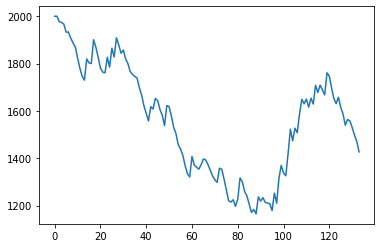

In [354]:
cajero_reciclador_1 = CajeroReciclador(CAPACIDAD,CANTIDAD_BILLETES_INCIAL)
estadisticas_1 = realizar_simulacion(cajero_reciclador_1, TIEMPO_MEDIO_ARRIBOS, 1)

plt.plot(estadisticas_1["billetes_tras_transaccion"])

#### c) Calcular el tiempo medio que los clientes demoraron en el sistema (espera + utilización del cajero)

In [355]:
print("Tiempo medio demoras en los 1000 dias: " + str(estadisticas_1000["tiempo_medio_demoras"]))
print("Tiempo medio demoras en 1 dias: " + str(estadisticas_1["tiempo_medio_demoras"]))

Tiempo medio demoras en los 1000 dias: 0.05647679664553072
Tiempo medio demoras en 1 dias: 0.05998286385883611


#### d) ¿Recomienda a la entidad que implemente el cambio de cajero?

La entidad conoce que con el cajero actual el 20% de los clientes se retiraba sin poder extraer dinero, y sólo
acepta cambiarlo si este porcentaje disminuye.

In [356]:
# En la simulacion de 1000 dias vimos que 
print ("% extracciones fallidas: " + str((estadisticas_1000["cantidad_extracciones_fallidas"] / estadisticas_1000["cantidad_extracciones"]) *100))

% extracciones fallidas: 0.040032025620496396


In [357]:
# En la simulacion de 1 dia vimos que 
print ("% extracciones fallidas: " + str((estadisticas_1["cantidad_extracciones_fallidas"] / estadisticas_1["cantidad_extracciones"]) *100))

% extracciones fallidas: 0.0


Respuesta: Si, se recomienda el cambio de cajero

### ¿ Qué pasa con el cajero estandar?

### Si miro 1 solo dia 

In [358]:
cajero_estandar_1 = CajeroEstandar(CAPACIDAD_BILLETES_DEPOSITOS, CAPACIDAD_BILLETES_EXTRACCIONES)
estadisticas_estandar_1 = realizar_simulacion(cajero_estandar_1, TIEMPO_MEDIO_ARRIBOS, 1)

##### Despositos

In [359]:
print ("Cantidad de depositos: " + str(estadisticas_estandar_1["cantidad_depositos"]))
print ("exitosos: " + str(estadisticas_estandar_1["cantidad_depositos_exitosos"]))
print ("fallidos: " + str(estadisticas_estandar_1["cantidad_depositos_fallidos"]))
print ("% fallidos: " + str((estadisticas_estandar_1["cantidad_depositos_fallidos"] / estadisticas_estandar_1["cantidad_depositos"])*100))

Cantidad de depositos: 40
exitosos: 31
fallidos: 9
% fallidos: 22.5


##### Extracciones

In [360]:
print ("cantidad de extracciones: " + str(estadisticas_estandar_1["cantidad_extracciones"]))
print ("exitosas: " + str(estadisticas_estandar_1["cantidad_extracciones_exitosas"]))
print ("fallidas: " + str(estadisticas_estandar_1["cantidad_extracciones_fallidas"]))
print ("% fallidas: " + str((estadisticas_estandar_1["cantidad_extracciones_fallidas"] / estadisticas_estandar_1["cantidad_extracciones"])*100))

cantidad de extracciones: 106
exitosas: 80
fallidas: 26
% fallidas: 24.528301886792452


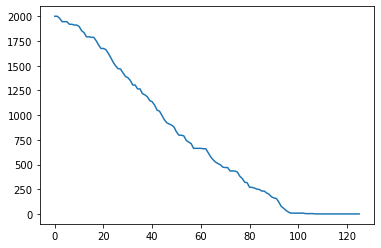

In [361]:
plt.plot(estadisticas_estandar["billetes_tras_transaccion"])

### Si miro 1000 dias 

In [362]:
cajero_estandar_1000 = CajeroEstandar(CAPACIDAD_BILLETES_DEPOSITOS, CAPACIDAD_BILLETES_EXTRACCIONES)
estadisticas_estandar_1000 = realizar_simulacion(cajero_estandar_1000, TIEMPO_MEDIO_ARRIBOS, 1)

##### Despositos

In [363]:
("Cantidad de depositos: " + str(estadisticas_estandar_1000["cantidad_depositos"]))
print ("exitosos: " + str(estadisticas_estandar_1000["cantidad_depositos_exitosos"]))
print ("fallidos: " + str(estadisticas_estandar_1000["cantidad_depositos_fallidos"]))
print ("% fallidos: " + str((estadisticas_estandar_1000["cantidad_depositos_fallidos"] / estadisticas_estandar_1000["cantidad_depositos"])*100))

exitosos: 34
fallidos: 1
% fallidos: 2.857142857142857


##### Extracciones

In [364]:
print ("cantidad de extracciones: " + str(estadisticas_estanda_1000["cantidad_extracciones"]))
print ("exitosas: " + str(estadisticas_estandar_1000["cantidad_extracciones_exitosas"]))
print ("fallidas: " + str(estadisticas_estandar_1000["cantidad_extracciones_fallidas"]))
print ("% fallidas: " + str((estadisticas_estandar_1000["cantidad_extracciones_fallidas"] /estadisticas_estandar_1000["cantidad_extracciones"])*100))

cantidad de extracciones: 115
exitosas: 80
fallidas: 28
% fallidas: 25.925925925925924
